# Essential Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore') 

# Data Gathering

In [2]:
data1 = [[1.1,2.2,3.3],[4.4,5.5,6.6],[7.7,8.8,9.9]]
pd.DataFrame(data=data1,columns=['a','b','c'],index=[1,2,3])

,a,b,c
1,1.1,2.2,3.3
2,4.4,5.5,6.6
3,7.7,8.8,9.9


In [3]:
d2 = pd.DataFrame({'a':[1,4,7],'b':[2,np.nan,8],'c':[3,6,99],'d':['mo',np.nan,'ab']})
d2 

,a,b,c,d
0,1,2.0,3,mo
1,4,NaN,6,NaN
2,7,8.0,99,ab


<AxesSubplot: >

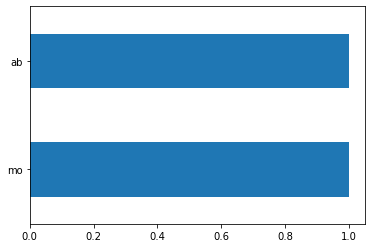

In [4]:
d2['d'].value_counts().plot(kind='barh')

In [5]:
df = pd.read_csv('ZomatoData.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


# Initial Data Study

In [6]:
df.describe()

,RestaurantID,CountryCode,Longitude,Latitude,Price_range,Votes,Average_Cost_for_two,Rating
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,56.750546,41.467058,11.007935,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,1.000000,-157.948486,-41.330428,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,1.000000,77.191964,28.570469,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,1.000000,77.282006,28.642758,2.000000,131.000000,700.000000,3.700000
max,1.850065e+07,216.000000,174.832089,55.976980,4.000000,10934.000000,800000.000000,4.900000


In [7]:
df.describe(include='all')

,RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,9551,9551,9551,9551,9551,9551.000000,9551.000000,9551.000000,9551.000000
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,12,2,2,2,1,NaN,NaN,NaN,NaN
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,Indian Rupees(Rs.),No,No,No,No,NaN,NaN,NaN,NaN
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,8652,8393,7100,9517,9551,NaN,NaN,NaN,NaN
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,NaN,NaN,NaN,NaN,NaN,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,NaN,NaN,NaN,NaN,NaN,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,131.000000,700.000000,3.700000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RestaurantID          9551 non-null   int64  
 1   RestaurantName        9551 non-null   object 
 2   CountryCode           9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   LocalityVerbose       9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has_Table_booking     9551 non-null   object 
 12  Has_Online_delivery   9551 non-null   object 
 13  Is_delivering_now     9551 non-null   object 
 14  Switch_to_order_menu  9551 non-null   object 
 15  Price_range          

In [9]:
df.nunique()

RestaurantID            9551
RestaurantName          7446
CountryCode               15
City                     141
Address                 8918
Locality                1208
LocalityVerbose         1265
Longitude               8120
Latitude                8677
Cuisines                1825
Currency                  12
Has_Table_booking          2
Has_Online_delivery        2
Is_delivering_now          2
Switch_to_order_menu       1
Price_range                4
Votes                   1012
Average_Cost_for_two     140
Rating                    33
dtype: int64

In [10]:
catcols = []
for i in df.columns:
    if (df[i].nunique())<30:
        print(i,":",df[i].unique())
        print()
        catcols.append(i)
catcols

CountryCode : [162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]

Currency : ['Botswana Pula(P)' 'Brazilian Real(R$)' 'Dollar($)' 'Emirati Diram(AED)'
 'Indian Rupees(Rs.)' 'Indonesian Rupiah(IDR)' 'NewZealand($)'
 'Pounds(Œ£)' 'Qatari Rial(QR)' 'Rand(R)' 'Sri Lankan Rupee(LKR)'
 'Turkish Lira(TL)']

Has_Table_booking : ['Yes' 'No']

Has_Online_delivery : ['No' 'Yes']

Is_delivering_now : ['No' 'Yes']

Switch_to_order_menu : ['No']

Price_range : [3 4 2 1]



['CountryCode',
 'Currency',
 'Has_Table_booking',
 'Has_Online_delivery',
 'Is_delivering_now',
 'Switch_to_order_menu',
 'Price_range']

## Basic Data Study Report

In [11]:
#Colums Selected & Rejected

# Feature Extraction  

In [12]:
df['Number_of_Cuisines'] = df['Cuisines'].apply(lambda x:len(str(x).split(',')))

In [13]:
df.head()

,RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating,Number_of_Cuisines
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2


In [14]:
# Converting types of cuisines available to number of cuisines available
UselessColumns = ['RestaurantID', 'RestaurantName','City','Address','Locality', 'LocalityVerbose','Cuisines']
df = df.drop(UselessColumns,axis=1)
df.head()

,CountryCode,Longitude,Latitude,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating,Number_of_Cuisines
0,162,121.027535,14.565443,Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,162,121.014101,14.553708,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,162,121.056831,14.581404,Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,162,121.056475,14.585318,Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,162,121.057508,14.584450,Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2


In [15]:
df.iloc[1:4,3:5]

,Currency,Has_Table_booking
1,Botswana Pula(P),Yes
2,Botswana Pula(P),Yes
3,Botswana Pula(P),No


# EDA

In [16]:
df.head()   

,CountryCode,Longitude,Latitude,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating,Number_of_Cuisines
0,162,121.027535,14.565443,Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,162,121.014101,14.553708,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,162,121.056831,14.581404,Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,162,121.056475,14.585318,Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,162,121.057508,14.584450,Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2


In [17]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CountryCode           9551 non-null   int64  
 1   Longitude             9551 non-null   float64
 2   Latitude              9551 non-null   float64
 3   Currency              9551 non-null   object 
 4   Has_Table_booking     9551 non-null   object 
 5   Has_Online_delivery   9551 non-null   object 
 6   Is_delivering_now     9551 non-null   object 
 7   Switch_to_order_menu  9551 non-null   object 
 8   Price_range           9551 non-null   int64  
 9   Votes                 9551 non-null   int64  
 10  Average_Cost_for_two  9551 non-null   int64  
 11  Rating                9551 non-null   float64
 12  Number_of_Cuisines    9551 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 970.1+ KB


- Categorical & Discrete variables: Bar plot/ Countplot  
- Continuous variables: Histogram

Categorical & Discrete Predictors: 'CountryCode', 'Currency', 'Has_Table_booking', 'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order menu','Price_range', 'Number_of_Cuisines'

We use bar charts to see how the data is distributed for these categorical columns.

In [29]:
cgt = []
for i in df.columns:
    if (df[i].nunique())<20:
        cgt.append(i)
cgt 
        

['CountryCode',
 'Currency',
 'Has_Table_booking',
 'Has_Online_delivery',
 'Is_delivering_now',
 'Switch_to_order_menu',
 'Price_range',
 'Number_of_Cuisines']

In [18]:
catcols = ['CountryCode', 'Currency', 'Has_Table_booking', 'Has_Online_delivery', 'Is_delivering_now',
    'Switch_to_order_menu','Price_range', 'Number_of_Cuisines']

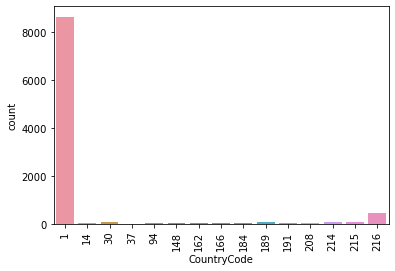

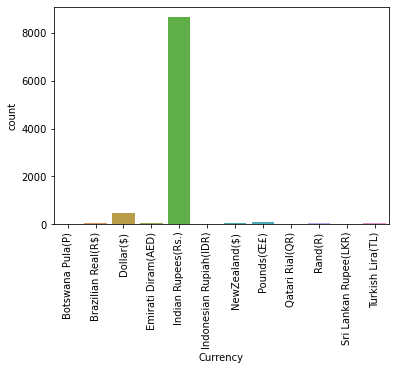

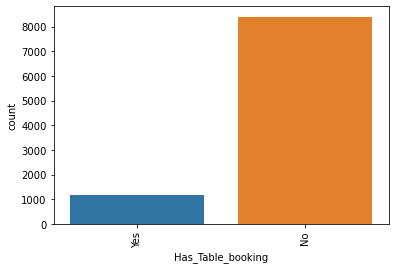

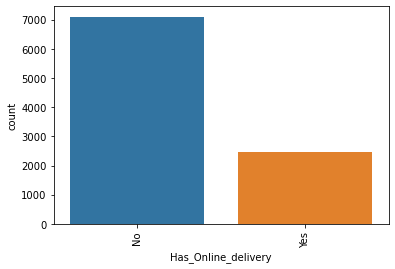

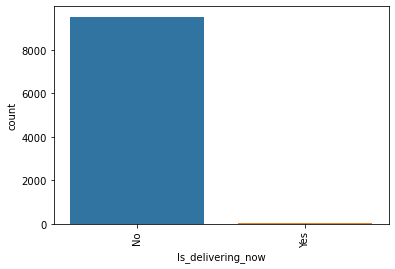

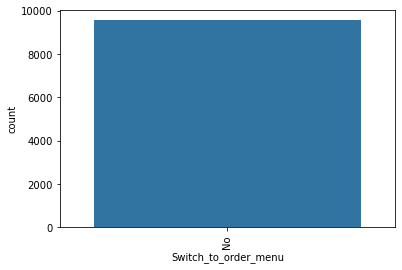

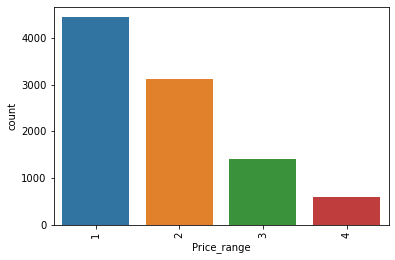

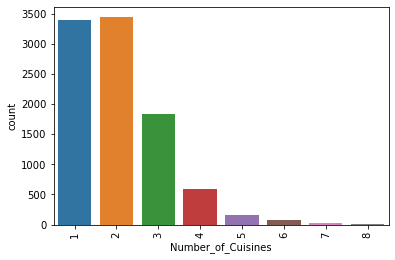

In [20]:
for i in catcols:
    sns.countplot(data=df, x=i)
    plt.xticks(rotation=90)
    plt.show()

Bar Charts Interpretation:

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers, these kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.
In this data, "Country Code", "Currency", "is delivering now" and "Switch to order menu" are too skewed. There is just one bar which is dominating and other categories have very less rows or there is just one value only. Such columns are not correlated with the target variable because there is no information to learn. The algorithms cannot find any rule like when the value is this then the target variable is that.
Selected Categorical Variables:

Only three categorical variables are selected for further analysis.
'Has Table booking', 'Has Online delivery', 'Price range', 'Number_of_Cuisines'

In [ ]:
# Distribution of these Categorical & Discrete Variables with Continuous Target Variable-

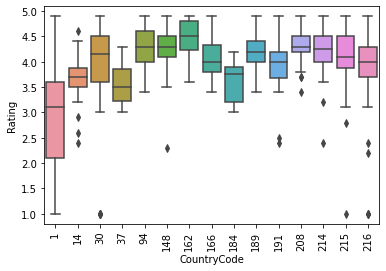

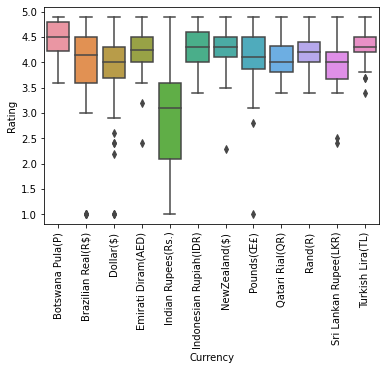

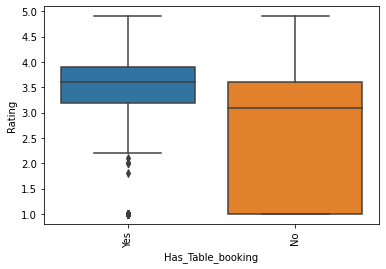

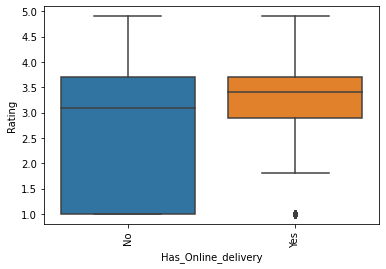

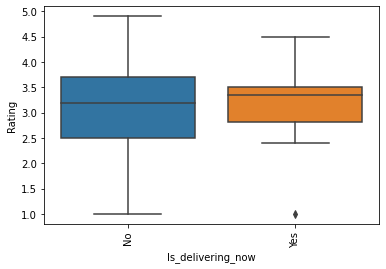

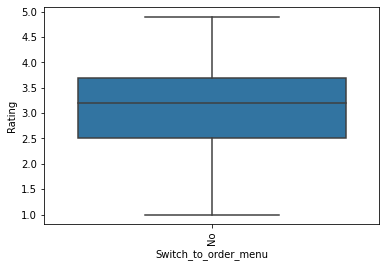

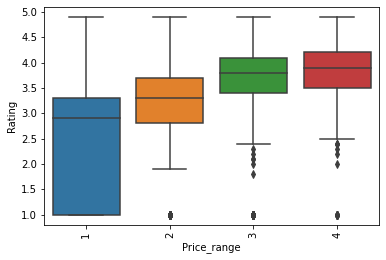

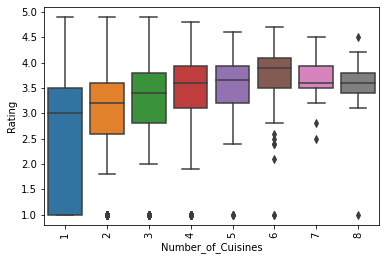

In [23]:
for i in catcols:
    sns.boxplot(data=df, x=i,y='Rating')
    plt.xticks(rotation=90)
    plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CountryCode           9551 non-null   int64  
 1   Longitude             9551 non-null   float64
 2   Latitude              9551 non-null   float64
 3   Currency              9551 non-null   object 
 4   Has_Table_booking     9551 non-null   object 
 5   Has_Online_delivery   9551 non-null   object 
 6   Is_delivering_now     9551 non-null   object 
 7   Switch_to_order_menu  9551 non-null   object 
 8   Price_range           9551 non-null   int64  
 9   Votes                 9551 non-null   int64  
 10  Average_Cost_for_two  9551 non-null   int64  
 11  Rating                9551 non-null   float64
 12  Number_of_Cuisines    9551 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 970.1+ KB


In [27]:
cnt = []
for i in df.columns:
    if (df[i].nunique())>20 and (df[i].dtype=='float64' or df[i].dtype=='int64'):
        cnt.append(i)
cnt 

['Longitude', 'Latitude', 'Votes', 'Average_Cost_for_two', 'Rating']

In [ ]:
#Continuous(Numerical) Columns Study:-

In [30]:
#Continuous columns list
contcols = ['Longitude', 'Latitude','Votes', 'Average_Cost_for_two']

array([[<AxesSubplot: title={'center': 'Longitude'}>,
        <AxesSubplot: title={'center': 'Latitude'}>],
       [<AxesSubplot: title={'center': 'Votes'}>,
        <AxesSubplot: title={'center': 'Average_Cost_for_two'}>]],
      dtype=object)

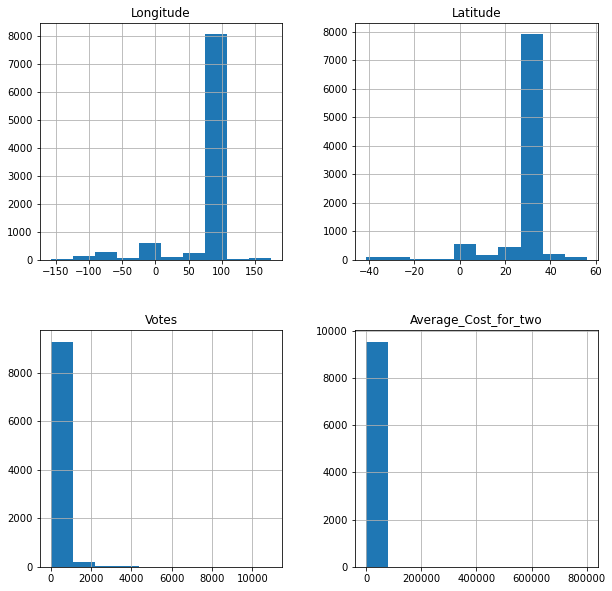

In [31]:
df.hist(['Longitude', 'Latitude','Votes', 'Average_Cost_for_two'], figsize=(10,10))

In [ ]:
# Correlation Matrix for Continuous vs Continuous visualization-

<AxesSubplot: >

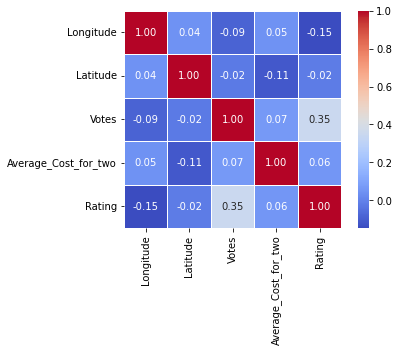

In [42]:
crl = df[['Longitude', 'Latitude','Votes', 'Average_Cost_for_two', 'Rating']].corr()

sns.heatmap(data=crl, square=True, linecolor='white',linewidths=0.6,annot=True,cmap='coolwarm',fmt=".2f") 

# Outliers Treatment

In [46]:
df['Longitude'].nunique()

8120

In [84]:
df  

,CountryCode,Longitude,Latitude,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating,Number_of_Cuisines
0,162,121.027535,14.565443,Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,162,121.014101,14.553708,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,162,121.056831,14.581404,Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,162,121.056475,14.585318,Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,162,121.057508,14.584450,Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,208,28.977392,41.022793,Turkish Lira(TL),No,No,No,No,3,788,80,4.1,1
9547,208,29.041297,41.009847,Turkish Lira(TL),No,No,No,No,3,1034,105,4.2,3
9548,208,29.034640,41.055817,Turkish Lira(TL),No,No,No,No,4,661,170,3.7,2
9549,208,29.036019,41.057979,Turkish Lira(TL),No,No,No,No,4,901,120,4.0,1


In [88]:
df["Number_of_Cuisines"].value_counts(normalize=True)*100

2    36.059051
1    35.629777
3    19.264998
4     6.114543
5     1.717098
6     0.774788
7     0.293163
8     0.146582
Name: Number_of_Cuisines, dtype: float64

In [99]:
df["Number_of_Cuisines"][df["Number_of_Cuisines"]>3] = 'other'

In [100]:
df["Number_of_Cuisines"].value_counts(normalize=True)*100 

2        36.059051
1        35.629777
3        19.264998
other     9.046173
Name: Number_of_Cuisines, dtype: float64